# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# **READING DATASET**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hourly Data",parse_dates=["Datetime"])

In [ ]:
print("First Five Rows ","\n")
print(df.head(5))

First Five Rows  

             Datetime   AEP_MW
0 2004-12-31 01:00:00  13478.0
1 2004-12-31 02:00:00  12865.0
2 2004-12-31 03:00:00  12577.0
3 2004-12-31 04:00:00  12517.0
4 2004-12-31 05:00:00  12670.0


In [ ]:
print("Last Five Rows ","\n")
print(df.tail(5))

Last Five Rows  

                  Datetime   AEP_MW
121268 2018-01-01 20:00:00  21089.0
121269 2018-01-01 21:00:00  20999.0
121270 2018-01-01 22:00:00  20820.0
121271 2018-01-01 23:00:00  20415.0
121272 2018-01-02 00:00:00  19993.0


In [ ]:
print("Information About Dataset","\n")
print(df.info())

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB
None


In [ ]:
print("Describe the Dataset ","\n")
print(df.describe())

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [ ]:
print("Data Type","\n")
print(df.dtypes)

Data Type 

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


In [ ]:
print("Null Values","\n")
print(df.isnull().sum())

Null Values 

Datetime    0
AEP_MW      0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Reformating Date Time Columns**

In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)

<ipython-input-102-91151a2ebd5a>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week


In [ ]:
df1 = df
df1.head(10)

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday
5,2004-12-31 06:00:00,13038.0,12,2004,2004-12-31,06:00:00,53,Friday
6,2004-12-31 07:00:00,13692.0,12,2004,2004-12-31,07:00:00,53,Friday
7,2004-12-31 08:00:00,14297.0,12,2004,2004-12-31,08:00:00,53,Friday
8,2004-12-31 09:00:00,14719.0,12,2004,2004-12-31,09:00:00,53,Friday
9,2004-12-31 10:00:00,14941.0,12,2004,2004-12-31,10:00:00,53,Friday


## **Unique Years**

In [ ]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Years:", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Years: 15 



In [ ]:
df1[df1["Year"] == 2017].nunique()

Datetime    8759
AEP_MW      5440
Month         12
Year           1
Date         365
Time          24
Week          52
Day            7
dtype: int64

# **Highest Energy consumption in years**

**Maximum Consumption**

In [ ]:
df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
30221,2008-10-20 14:00:00,25695.0,10,2008,2008-10-20,14:00:00,43,Monday


**Minimum Consumption**

In [ ]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
100759,2016-10-02 05:00:00,9581.0,10,2016,2016-10-02,05:00:00,39,Sunday


**Conclusion : The Maximum Energy Consumption was 25695 MW on 20-10-2008 at 14:00 and Minimum Energy Consumption was 9581 MW on 02-10-2016 at 05:00**

In [ ]:
pd.plotting.register_matplotlib_converters()

# **Plotting and Data Visualization**


Text(0.5, 1.0, 'Energy Distribution')

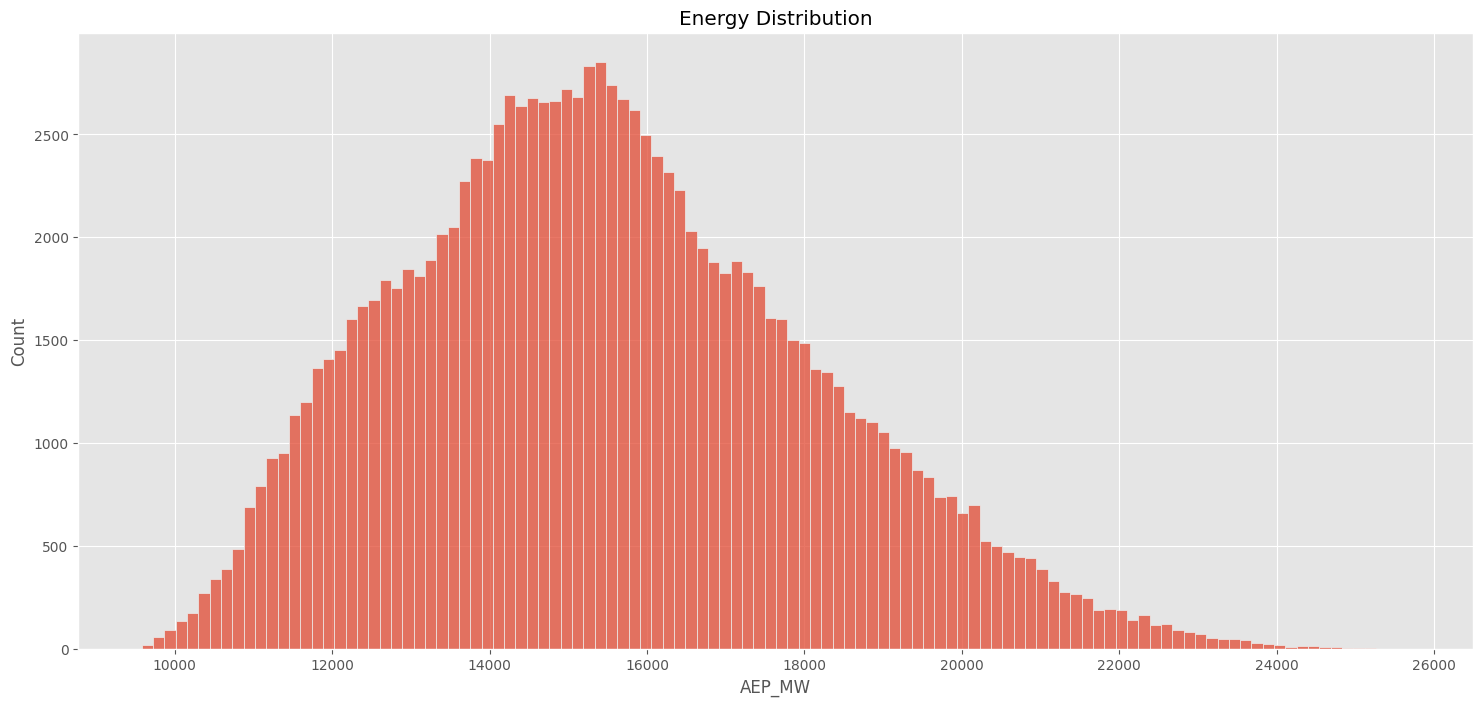

In [ ]:
sns.histplot(df1["AEP_MW"])
plt.title("Energy Distribution")

# **Relationship between Energy vs Year, Month & Day**

## **Energy vs Year**

Text(0.5, 1.0, 'Energy Consumption According to Year')

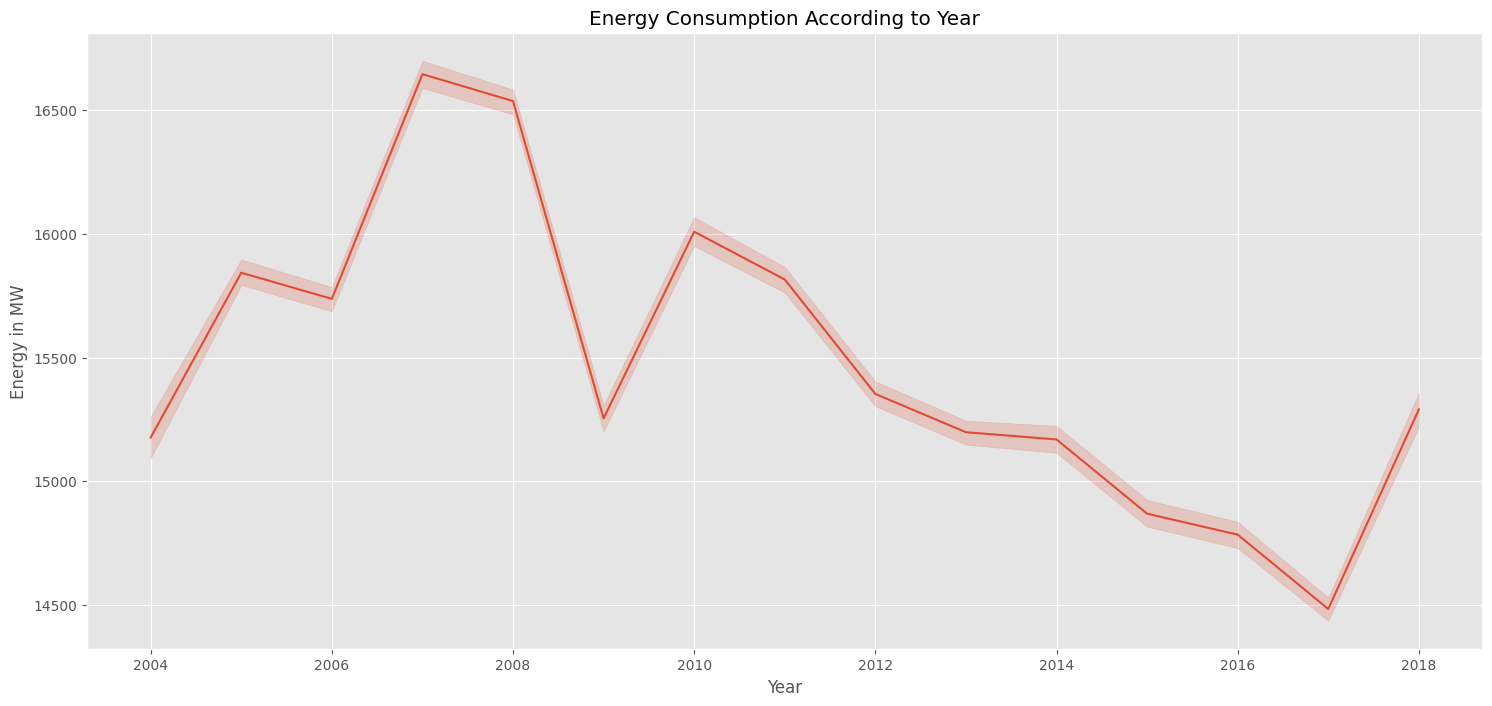

In [ ]:
sns.lineplot(x=df1["Year"],y=df1["AEP_MW"], data=df1)

plt.xlabel("Year")
plt.ylabel("Energy in MW")

plt.title("Energy Consumption According to Year")

## **Energy vs Month**

Text(0.5, 1.0, 'Energy Consumption According to Month')

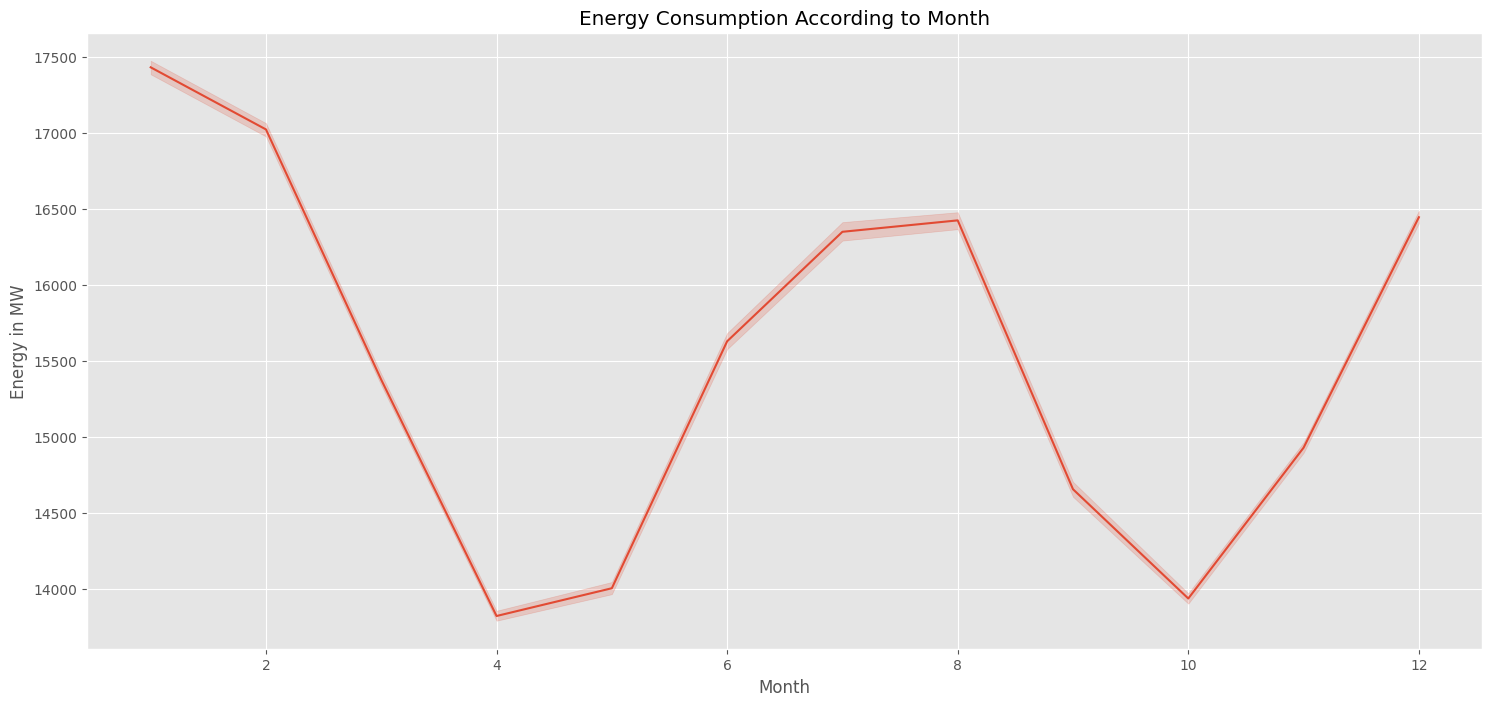

In [ ]:
sns.lineplot(x=df1["Month"],y=df1["AEP_MW"], data=df1)

plt.xlabel("Month")
plt.ylabel("Energy in MW")

plt.title("Energy Consumption According to Month")

## **Energy vs Weekdays**

Text(0.5, 1.0, 'Energy Consumption According to Weekdays')

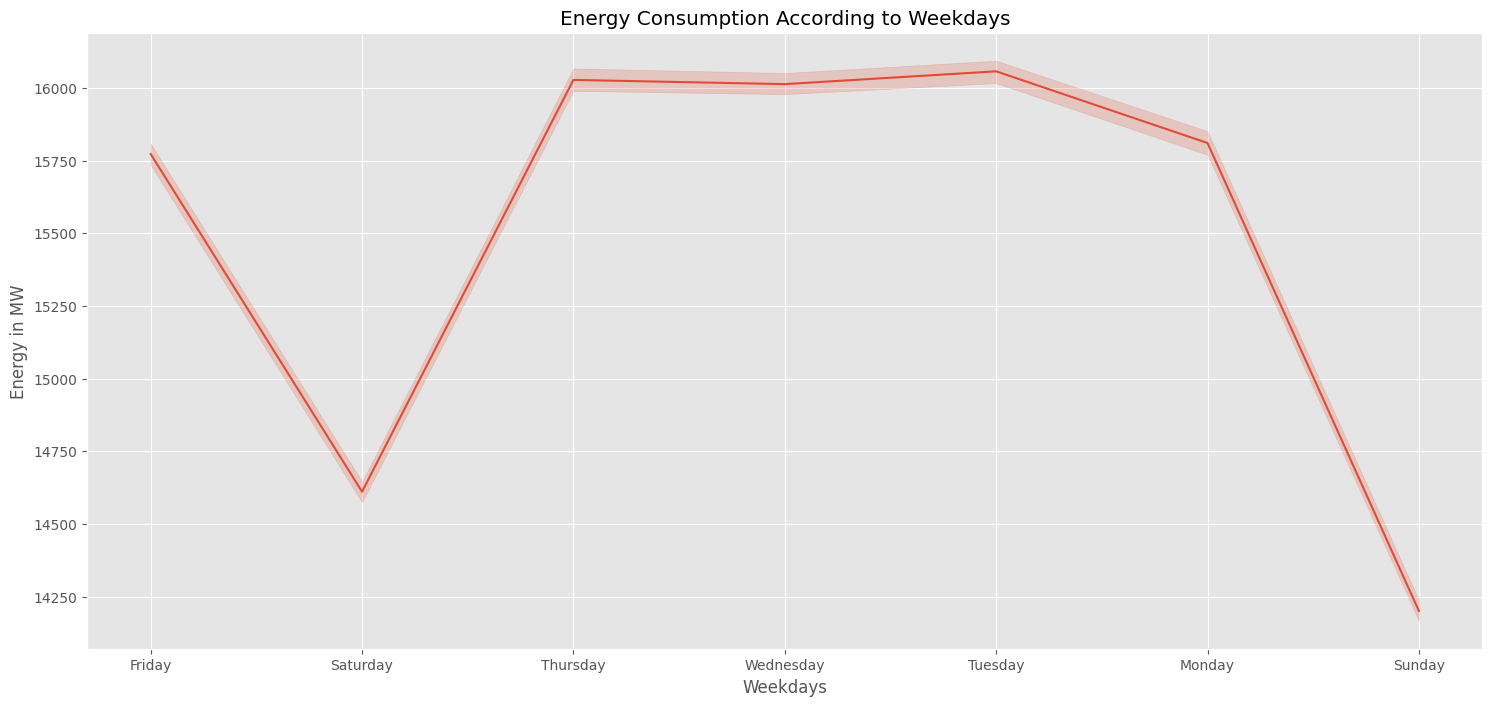

In [ ]:
sns.lineplot(x=df1["Day"],y=df1["AEP_MW"], data=df1)
plt.xlabel("Weekdays")
plt.ylabel("Energy in MW")
plt.title("Energy Consumption According to Weekdays")

# **Plotting for individual Years**

<ipython-input-113-51a1623b5ee2>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2016 = dataset["2016"]["AEP_MW"].to_list()
<ipython-input-113-51a1623b5ee2>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2016 = dataset["2016"]["Date"].to_list()
<ipython-input-113-51a1623b5ee2>:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2017 = dataset["2017"]["AEP_MW"].to_list()
<ipython-input-113-51a1623b5ee2>:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a sing

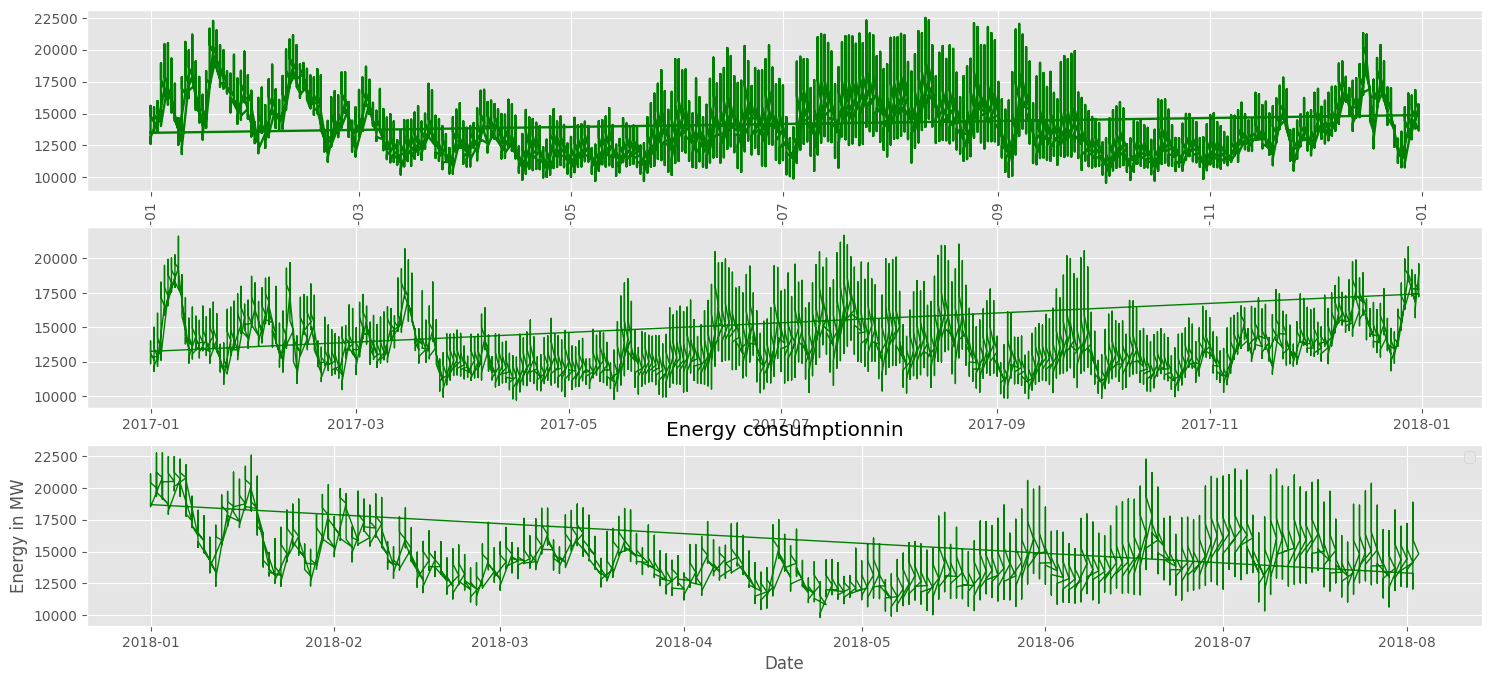

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2016 = dataset["2016"]["AEP_MW"].to_list()
x_2016 = dataset["2016"]["Date"].to_list()
ax1.plot(x_2016,y_2016, color="green", linewidth=1.7)


y_2017 = dataset["2017"]["AEP_MW"].to_list()
x_2017 = dataset["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color="green", linewidth=1)


y_2018 = dataset["2018"]["AEP_MW"].to_list()
x_2018 = dataset["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# **Relation between Time and Energy**

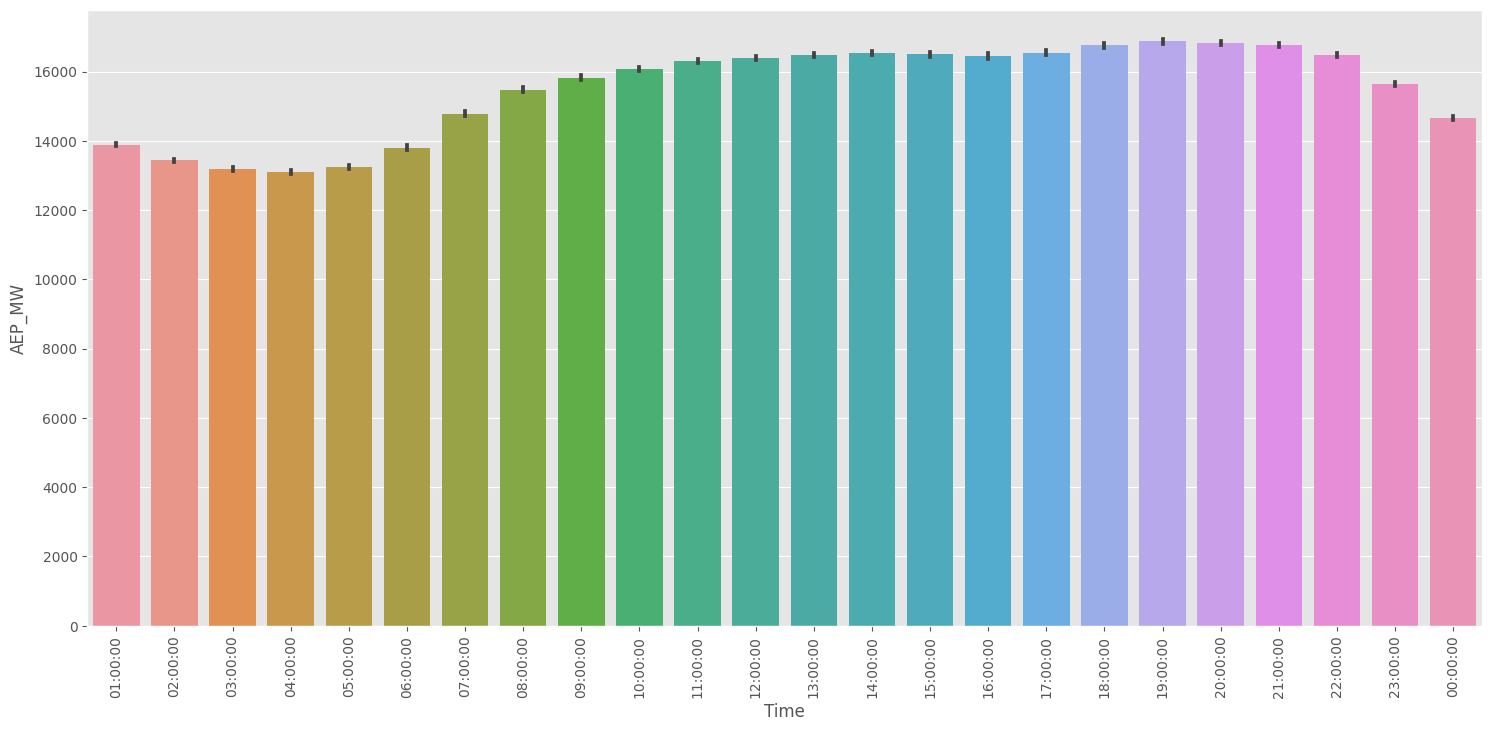

In [ ]:
yr=sns.barplot(x=df1["Time"],y=df1["AEP_MW"], data=df1)
yr.set_xticklabels(yr.get_xticklabels(), rotation=90);

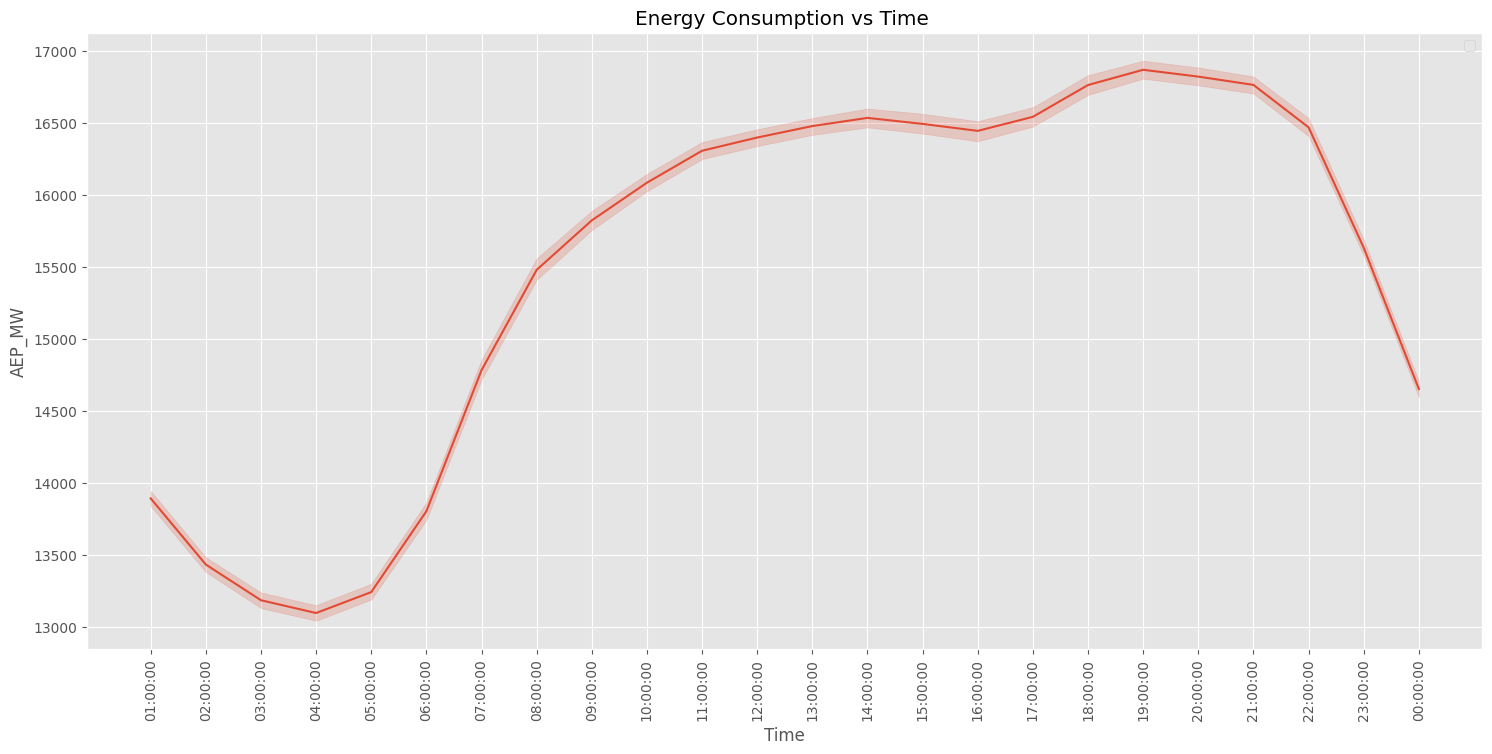

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"].astype(str),y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# **Resampleing Data**

In [ ]:
NewDataSet = dataset.resample('D').mean()

<ipython-input-116-8226c2f53dbb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [ ]:
type(Training_Set.values)

numpy.ndarray

In [ ]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [ ]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# **Model**

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 [==============================] - 26s 117ms/step - loss: 0.0241
Epoch 2/50
155/155 [==============================] - 18s 117ms/step - loss: 0.0184
Epoch 3/50
155/155 [==============================] - 20s 128ms/step - loss: 0.0174
Epoch 4/50
155/155 [==============================] - 19s 120ms/step - loss: 0.0168
Epoch 5/50
155/155 [==============================] - 18s 119ms/step - loss: 0.0156
Epoch 6/50
155/155 [==============================] - 19s 123ms/step - loss: 0.0156
Epoch 7/50
155/155 [==============================] - 18s 116ms/step - loss: 0.0148
Epoch 8/50
155/155 [==============================] - 20s 126ms/step - loss: 0.0130
Epoch 9/50
155/155 [==============================] - 18s 116ms/step - loss: 0.0114
Epoch 10/50
155/155 [==============================] - 18s 117ms/step - loss: 0.0097
Epoch 11/50
155/155 [==============================] - 20s 126ms/step - loss: 0.0091
Epoch 12/50
155/155 [==============================] - 18s 117ms/step - lo

# **Test Data**

In [ ]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0


In [ ]:
TestData.shape

(100, 4)

In [ ]:
NewDataSet.shape

(5055, 4)

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 2s 38ms/step


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## **Future Prediction**


In [ ]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13512.614258
1,2018-04-27,12964.000000,13047.126953
2,2018-04-28,12237.583333,14825.872070
3,2018-04-29,12156.791667,13407.937500
4,2018-04-30,13443.500000,13123.428711
...,...,...,...
95,2018-07-30,15368.083333,15539.106445
96,2018-07-31,15180.291667,15745.882812
97,2018-08-01,15151.166667,15288.968750
98,2018-08-02,15687.666667,15444.988281


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

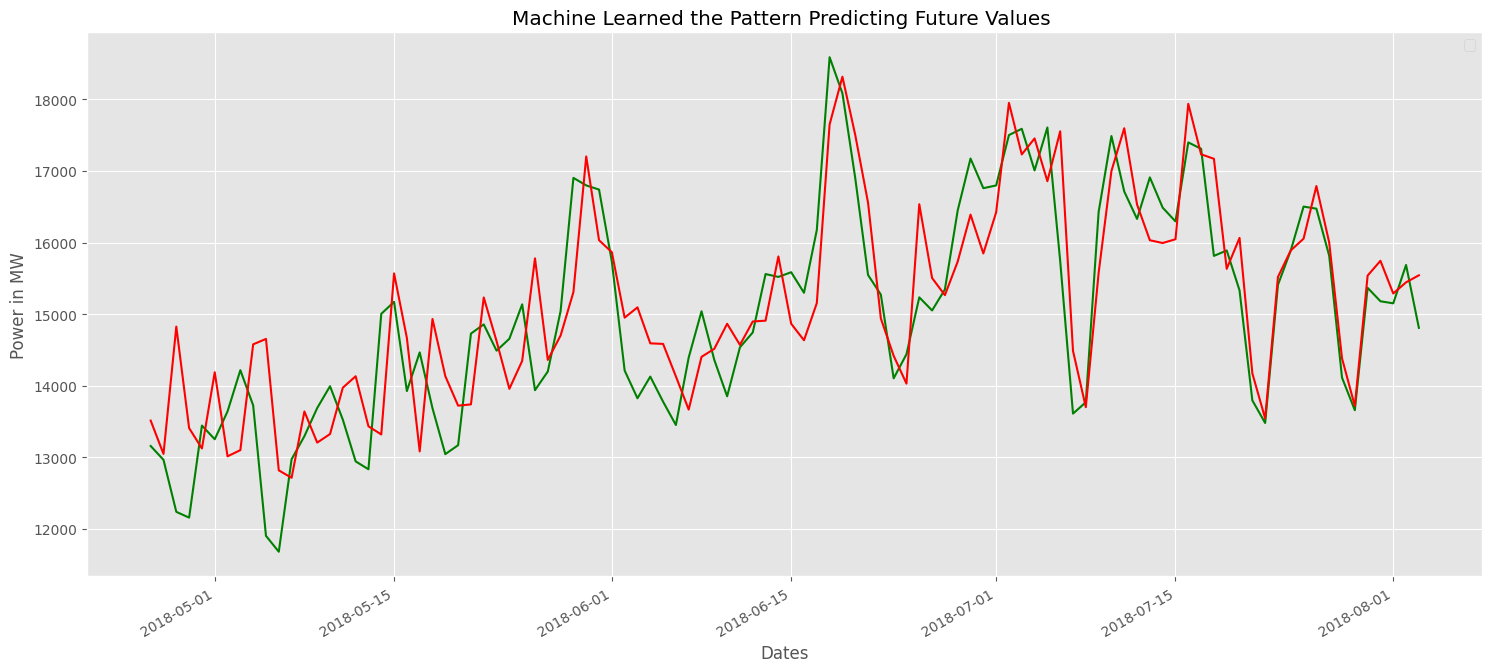

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()